In [1]:
from google.colab import files
uploaded_train = files.upload()

Saving data_k_mean.txt to data_k_mean.txt


In [3]:
import io
import pandas as pd

# reading the training data
data = pd.read_csv('/content/data_k_mean.txt', sep = ' ', header = None)
data_np = data.to_numpy()

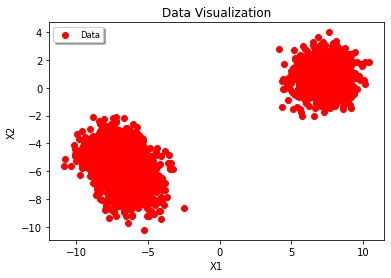

In [14]:
import matplotlib.pyplot as plt
plt.scatter(data[0], data[1], c = 'r', marker = 'o', label = 'Data')
plt.legend(loc='best', shadow=True, fontsize='small',labelspacing=.8)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Data Visualization")
plt.show()

In [7]:
# taking the input(k)
k = int(input("Enter the value of k : "))

Enter the value of k : 2


In [9]:
import numpy as np

np.random.seed(seed=83) # random centroids for first iteration
random_numbers = np.random.randint(low=0, high=len(data_np), size=(k,))
centroids = [data_np[random_numbers[i]] for i in range(k)]

In [10]:
distance = [] #to store the distance from point to classes
index_clusters = [-1 for i in range(len(data_np))] #to store class corresponding to index
count = 0 #to count the iteration number
clusters = {} #to store class numbers as keys and data points as values
# max 200 iterations
for x in range(200):
  count = x
  # flag to keep track whether change occurs or not
  flag = 0 
  for y in range(k):
    clusters[y] = []
  # iterate through each data points
  for i in range(len(data_np)):
    distance = []
    for j in range(k):
      dist = np.sqrt(pow((data_np[i][0] - centroids[j][0]), 2) + pow((data_np[i][1] - centroids[j][1]), 2))
      distance.append(dist)
    ind = distance.index(min(distance))
    # check whether the change occurs or not
    if index_clusters[i] != ind:
      flag = 1
      index_clusters[i] = ind
    clusters[ind].append(data_np[i])
  # if change occurs
  if flag == 0:
    break
  # calculating new centroids
  centroids = [np.mean(np.asarray(clusters[z]), axis=0) for z in range(k)]

In [11]:
#variables to plot class 1 and class 2 data points
x1 = np.asarray(clusters[0])[:, 0]
y1 = np.asarray(clusters[0])[:, 1]
x2 = np.asarray(clusters[1])[:, 0]
y2 = np.asarray(clusters[1])[:, 1]

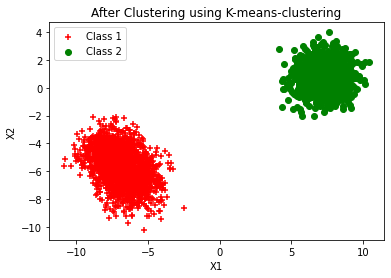

In [15]:
# plotting classified data points of two classes with different colored marker
plt.scatter(x1, y1, c = 'r', marker = '+', label = 'Class 1')
plt.scatter(x2, y2, c = 'g', marker = 'o', label = 'Class 2')
plt.legend(loc = 'best')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("After Clustering using K-means-clustering")
plt.show()